# Data Mining

This NoteBook is dedicated to:

1. Data Cleaning and Preprocessing
2. Train and evaluating 4 different data mining models to understand complex patterns within collected data

the DM models as one of the critical components of a Decision support system will detect lying patterns and relations within data.

## Required Packages

In [1]:
import sys

sys.path.append(r"h:\Resume\Projects\DataScience\Banking Telemarketing Decision Support System\Project")

import pandas as pd
import numpy as np

import importlib

from src.data_preprocessing import create_preprocessor, cleaning_pipeline_step

import src.data_ingestion as load
from src.models.model_selection import train_log_compare_models
from configs.config_repository import ConfigRepository
from src.models.model_repository import ModelRepository

from src.models.model_utils import get_features_importance_df

## Data Prepration

### Loading the data

In [2]:
df_train = load.load_csv_to_dataframe(file_path = '../data//raw/bank-full.csv')
df_test = load.load_csv_to_dataframe(file_path = '../data/raw/bank.csv' )

Dataset loaded successfully with 45211 rows and 17 columns.
Dataset loaded successfully with 4521 rows and 17 columns.


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Data Cleaning
* Remove duplicate rows.
* Handle missing values.
* Correct textual inconsistencies
* removing outliers

In [5]:
df_train_cleaned = cleaning_pipeline_step(
    df_train,
    outlier_removal=True
)

df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43836 entries, 0 to 43835
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43836 non-null  int64 
 1   job        43836 non-null  object
 2   marital    43836 non-null  object
 3   education  43836 non-null  object
 4   default    43836 non-null  object
 5   balance    43836 non-null  int64 
 6   housing    43836 non-null  object
 7   loan       43836 non-null  object
 8   contact    43836 non-null  object
 9   day        43836 non-null  int64 
 10  month      43836 non-null  object
 11  duration   43836 non-null  int64 
 12  campaign   43836 non-null  int64 
 13  pdays      43836 non-null  int64 
 14  previous   43836 non-null  int64 
 15  poutcome   43836 non-null  object
 16  y          43836 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.7+ MB


In [6]:
df_test_cleaned = cleaning_pipeline_step(
    df_test,
    outlier_removal=True
)

df_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4393 non-null   int64 
 1   job        4393 non-null   object
 2   marital    4393 non-null   object
 3   education  4393 non-null   object
 4   default    4393 non-null   object
 5   balance    4393 non-null   int64 
 6   housing    4393 non-null   object
 7   loan       4393 non-null   object
 8   contact    4393 non-null   object
 9   day        4393 non-null   int64 
 10  month      4393 non-null   object
 11  duration   4393 non-null   int64 
 12  campaign   4393 non-null   int64 
 13  pdays      4393 non-null   int64 
 14  previous   4393 non-null   int64 
 15  poutcome   4393 non-null   object
 16  y          4393 non-null   object
dtypes: int64(7), object(10)
memory usage: 583.6+ KB


### Seperating Xs and ys.


#### Loading configurations and data

In [7]:
y_train = df_train_cleaned['y']
X_train = df_train_cleaned.drop(columns=['y'])
 

y_test = df_test_cleaned['y']
X_test = df_test_cleaned.drop(columns=['y'])

In [8]:
# get the name of columns
cat_columns = X_train.select_dtypes(include='object').columns.tolist()
num_columns = X_train.select_dtypes(include='number').columns.tolist()

Test the config repository functionality

In [9]:
cr = ConfigRepository(config_path="../configs/models_config.json")

#### Define The preprocessing pipeline

In [10]:

preprocess_pipe = create_preprocessor(num_features=num_columns, 
                                      cat_features=cat_columns)

Testing preprocessing pipeline functionality

In [11]:
preprocessed_test = preprocess_pipe.fit_transform(X_test, y_test)

In [12]:
preprocessed_test.shape

(4393, 51)

Trial 26 Complete [00h 00m 15s]
val_auc: 0.9246830940246582

Best val_auc So Far: 0.9276796579360962
Total elapsed time: 00h 06m 07s
 93/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Best Candidate's AUC: 0.9279
Best hyperparameters: {'hidden_layers_idx': 1, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

***** Retrain the best Estimator on the full training set *****
Epoch 1/50


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2496/2496 - 8s - 3ms/step - auc: 0.9153 - loss: 0.3632
Epoch 2/50
2496/2496 - 7s - 3ms/step - auc: 0.9307 - loss: 0.3225
Epoch 3/50
2496/2496 - 7s - 3ms/step - auc: 0.9358 - loss: 0.3078
Epoch 4/50
2496/2496 - 7s - 3ms/step - auc: 0.9405 - loss: 0.2948
Epoch 5/50
2496/2496 - 7s - 3ms/step - auc: 0.9429 - loss: 0.2865
Epoch 6/50
2496/2496 - 7s - 3ms/step - auc: 0.9453 - loss: 0.2794
Epoch 7/50
2496/2496 - 7s - 3ms/step - auc: 0.9462 - loss: 0.2762
Epoch 8/50
2496/2496 - 7s - 3ms/step - auc: 0.9484 - loss: 0.2698
Epoch 9/50
2496/2496 - 7s - 3ms/step - auc: 0.9493 - loss: 0.2667
Epoch 10/50
2496/2496 - 6s - 3ms/step - auc: 0.9505 - loss: 0.2624
Epoch 11/50
2496/2496 - 7s - 3ms/step - auc: 0.9520 - loss: 0.2586
Epoch 12/50
2496/2496 - 6s - 3ms/step - auc: 0.9529 - loss: 0.2553
Epoch 13/50
2496/2496 - 7s - 3ms/step - auc: 0.9538 - loss: 0.2525
Epoch 14/50
2496/2496 - 7s - 3ms/step - auc: 0.9548 - loss: 0.2498
Epoch 15/50
2496/2496 - 6s - 3ms/step - auc: 0.9550 - loss: 0.2485
Epoch 16/50
249

2025/06/28 21:32:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'MLP' already exists. Creating a new version of this model...
Created version '3' of model 'MLP'.
2025-06-28 21:32:26 — INFO — Evaluating NeuralNetwork on test set…


Model registered: MLP
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py:65: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(
Models:  75%|███████▌  | 3/4 [1:22:45<26:54, 1614.32s/model]  2025-06-28 21:32:27 — INFO — Training SVC (4/4)…


n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 20
max_resources_: 45211
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2260
n_resources: 20
Fitting 5 folds for each of 2260 candidates, totalling 11300 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4520 fits failed out of a total of 11300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4520 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mehri

----------
iter: 1
n_candidates: 754
n_resources: 60
Fitting 5 folds for each of 754 candidates, totalling 3770 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.95214136 0.97715437 0.97715437]
  warnings.warn(


----------
iter: 2
n_candidates: 252
n_resources: 180
Fitting 5 folds for each of 252 candidates, totalling 1260 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.86887543 0.82383376 0.82383376]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.89744853 0.92864075 0.92864075]
  warnings.warn(


----------
iter: 3
n_candidates: 84
n_resources: 540
Fitting 5 folds for each of 84 candidates, totalling 420 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.91749432 0.90316818 0.90346048]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.98082609 0.95751386 0.95569626]
  warnings.warn(


----------
iter: 4
n_candidates: 28
n_resources: 1620
Fitting 5 folds for each of 28 candidates, totalling 140 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.90030791 0.90043967 0.90031556]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.96014607 0.96149878 0.96285779]
  warnings.warn(


----------
iter: 5
n_candidates: 10
n_resources: 4860
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.92007948 0.91922006 0.91767365]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.93972808 0.93665816 0.93214369]
  warnings.warn(


----------
iter: 6
n_candidates: 4
n_resources: 14580
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.91675605 0.91838418 0.91725027]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.9305029  0.93626913 0.93239183]
  warnings.warn(


----------
iter: 7
n_candidates: 2
n_resources: 43740
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.91725027 0.92604783 0.92629548]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.93239183 0.93372634 0.93458348]
  warnings.warn(
2025/06/28 23:58:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'BankMarketing_SVC'.
Created version '1' of model 'BankMarketing_SVC'.
2025-06-28 23:58:34 — INFO — Evaluating SVC on test set…


Model registered: BankMarketing_SVC


Models: 100%|██████████| 4/4 [3:49:01<00:00, 3435.36s/model]
2025-06-28 23:58:43 — INFO — === Test set performance summary ===
2025-06-28 23:58:43 — INFO — LogisticRegression    AUC=0.901  ALIFT=5.636
2025-06-28 23:58:43 — INFO — RandomForest          AUC=0.986  ALIFT=8.678
2025-06-28 23:58:43 — INFO — NeuralNetwork         AUC=0.976  ALIFT=8.250
2025-06-28 23:58:43 — INFO — SVC                   AUC=0.929  ALIFT=5.883


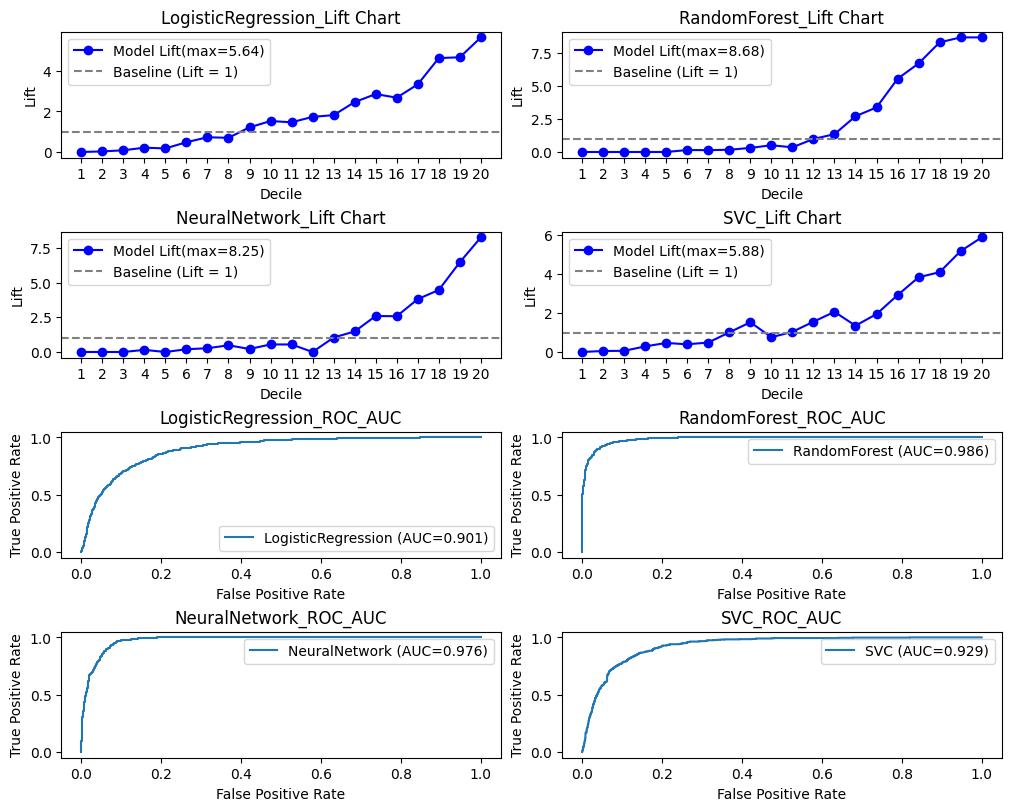

{'LogisticRegression': {'model': Pipeline(steps=[('preprocess',
                   FunctionTransformer(func=<bound method Pipeline.transform of Pipeline(steps=[('cleaning', DataCleaningTransformer()),
                  ('column_transformer',
                   ColumnTransformer(transformers=[('num',
                                                    Pipeline(steps=[('scaler',
                                                                     StandardScaler())]),
                                                    ['age', 'balance', 'day',
                                                     'duration', 'campaign',
                                                     'pdays', 'previous']),
                                                   ('cat',
                                                    Pipeline(steps=[('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                 

In [ ]:
train_log_compare_models(
                X_train=X_train,
                y_train=y_train,
                X_test=X_test,
                y_test=y_test,
                num_columns= num_columns,
                cat_columns=cat_columns,
                models_name=["LogisticRegression",
                            "RandomForest", "NeuralNetwork","SVC"],
                visualize = True,
                )


the best performance on the test set is belong to Random Forest Classifier which is an ensemble method .
after that the multi layered preceptron.

I'll use 

Trial 19 Complete [00h 00m 15s]
val_auc: 0.9215103387832642

Best val_auc So Far: 0.9268555045127869
Total elapsed time: 00h 04m 55s
 35/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Best Candidate's AUC: 0.9271
Best hyperparameters: {'hidden_layers_idx': 1, 'dropout_rate': 0.0, 'learning_rate': 0.001, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

***** Retrain the best Estimator on the full training set *****
Epoch 1/50


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2496/2496 - 8s - 3ms/step - auc: 0.9248 - loss: 0.3393
Epoch 2/50
2496/2496 - 7s - 3ms/step - auc: 0.9409 - loss: 0.2934
Epoch 3/50
2496/2496 - 7s - 3ms/step - auc: 0.9473 - loss: 0.2736
Epoch 4/50
2496/2496 - 7s - 3ms/step - auc: 0.9522 - loss: 0.2573
Epoch 5/50
2496/2496 - 7s - 3ms/step - auc: 0.9561 - loss: 0.2432
Epoch 6/50
2496/2496 - 7s - 3ms/step - auc: 0.9601 - loss: 0.2299
Epoch 7/50
2496/2496 - 7s - 3ms/step - auc: 0.9639 - loss: 0.2166
Epoch 8/50
2496/2496 - 6s - 3ms/step - auc: 0.9671 - loss: 0.2047
Epoch 9/50
2496/2496 - 7s - 3ms/step - auc: 0.9703 - loss: 0.1927
Epoch 10/50
2496/2496 - 7s - 3ms/step - auc: 0.9730 - loss: 0.1823
Epoch 11/50
2496/2496 - 6s - 3ms/step - auc: 0.9757 - loss: 0.1720
Epoch 12/50
2496/2496 - 7s - 3ms/step - auc: 0.9780 - loss: 0.1627
Epoch 13/50
2496/2496 - 6s - 3ms/step - auc: 0.9798 - loss: 0.1541
Epoch 14/50
2496/2496 - 7s - 3ms/step - auc: 0.9819 - loss: 0.1461
Epoch 15/50
2496/2496 - 7s - 3ms/step - auc: 0.9832 - loss: 0.1398
Epoch 16/50
249

2025/07/01 17:07:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'MLP' already exists. Creating a new version of this model...
Created version '4' of model 'MLP'.
2025-07-01 17:07:33 — INFO — Evaluating NeuralNetwork on test set…


Model registered: MLP
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py:65: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(
Models: 100%|██████████| 2/2 [1:13:53<00:00, 2216.51s/model]  
2025-07-01 17:07:34 — INFO — === Test set performance summary ===
2025-07-01 17:07:34 — INFO — RandomForest          AUC=0.986  ALIFT=8.678
2025-07-01 17:07:34 — INFO — NeuralNetwork         AUC=0.998  ALIFT=8.429


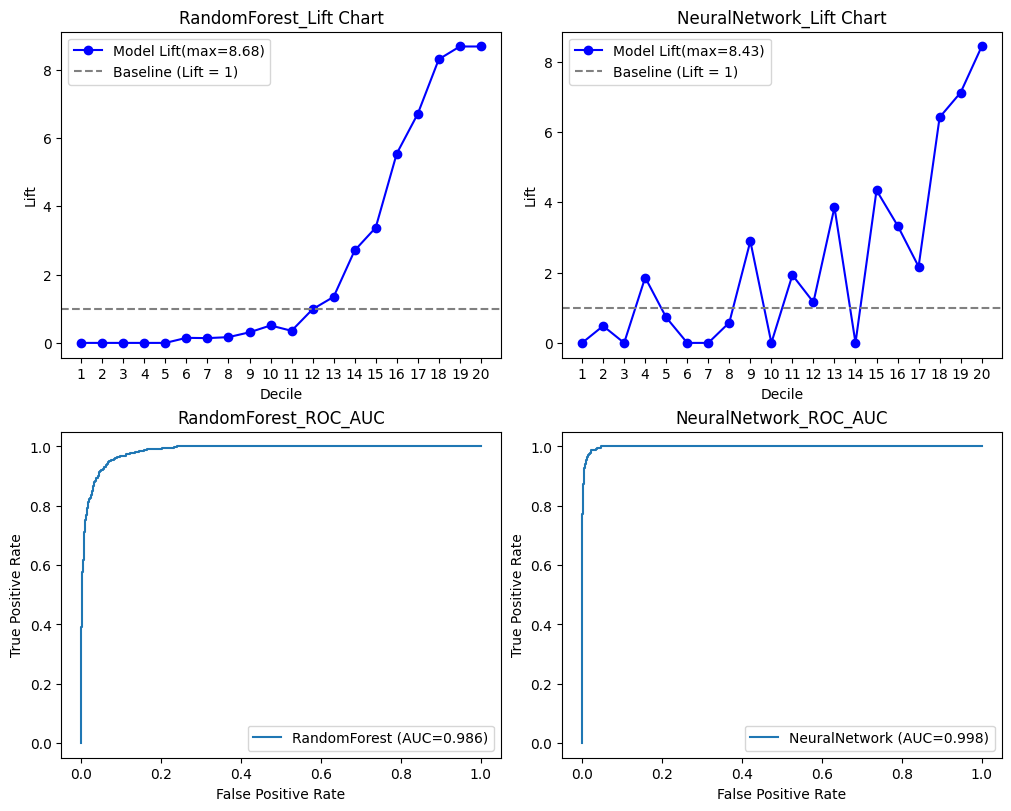

{'RandomForest': {'model': Pipeline(steps=[('preprocess',
                   Pipeline(steps=[('cleaning', DataCleaningTransformer()),
                                   ('column_transformer',
                                    ColumnTransformer(transformers=[('num',
                                                                     Pipeline(steps=[('scaler',
                                                                                      StandardScaler())]),
                                                                     ['age',
                                                                      'balance',
                                                                      'day',
                                                                      'duration',
                                                                      'campaign',
                                                                      'pdays',
                                                   

In [27]:
train_log_compare_models(
                X_train=X_train,
                y_train=y_train,
                X_test=X_test,
                y_test=y_test,
                preprocessing_pipeline = preprocess_pipe,
                models_name=["RandomForest", "NeuralNetwork"],
                visualize = True,
                )


In [ ]:
train_log_compare_models(
                X_train=X_train,
                y_train=y_train,
                X_test=X_test,
                y_test=y_test,
                num_columns= num_columns,
                cat_columns=cat_columns,
                models_name=["RandomForest"],
                visualize = True,
                )


Models:   0%|          | 0/1 [00:00<?, ?model/s]2025-07-02 12:58:20 — INFO — Training RandomForest (1/1)…


n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 20
max_resources_: 43836
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2191
n_resources: 20
Fitting 5 folds for each of 2191 candidates, totalling 10955 fits


### Feature Selection

In [11]:

model_repo = ModelRepository()

model_repo.list_registered_models()

[<RegisteredModel: aliases={}, creation_timestamp=1751142514114, description=None, last_updated_timestamp=1751142514139, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1751142514139, current_stage='None', description=None, last_updated_timestamp=1751142514139, name='BankMarketing_SVC', run_id='3b0252d42e0e4f6fa182f01d707cd9c6', run_link=None, source=('file:///h:/Resume/Projects/DataScience/Banking Telemarketing Decision '
  'Support '
  'System/Project/notebooks/../src/models/mlruns/636029484244639439/3b0252d42e0e4f6fa182f01d707cd9c6/artifacts/svm_model'), status='READY', status_message=None, tags={}, user_id=None, version=1>], name='BankMarketing_SVC', tags={}>,
 <RegisteredModel: aliases={}, creation_timestamp=1751092804033, description=None, last_updated_timestamp=1751129527351, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1751129527351, current_stage='None', description=None, last_updated_timestamp=1751129527351, name='LogReg', run_id='f59082006454

In [12]:
RF_pretrained = model_repo.load_model(registered_name='Random_Forest')
MLP_pretrained = model_repo.load_model(registered_name='MLP')


In [13]:
RandomForestClassifier = RF_pretrained.named_steps['clf']

In [14]:
MLP_Classifier = MLP_pretrained.named_steps['clf']

In [15]:

original_features_name = X_train.columns.to_list()
df_feature_importance= get_features_importance_df(RFpipeline=RF_pretrained, original_features_name=original_features_name)

In [16]:
df_feature_importance.sort_values(by="importance", ascending=False)

,features,importance
11,duration,0.42
10,month,0.11
15,poutcome,0.08
8,contact,0.06
0,age,0.05
5,balance,0.04
6,housing,0.04
9,day,0.04
13,pdays,0.03
2,marital,0.02


As is evident, features such as default, education, and job have only a slight impact on the customer's decision to subscribe to a long-term deposit.